# Visualizations

In this section, we'll do some visualization of the data that we loaded!

## Imports
These imports let us visualize the data!

In [1]:
from datascience import *
from utils import *
from ipywidgets import *
from IPython.display import *
from math import *

import pandas as pd
import numpy as np
import plotly.express as px;
import scipy.constants as constant

%pip install -q openpyxl

Note: you may need to restart the kernel to use updated packages.


<center><b><code style="font-size:30px; color:#003262">Note for Modules: This cell not needed when putting notebook components together</code></b></center>

In [4]:
cleaner = lambda x: x.replace("Sp", "Spring ")
class_data = Table.from_df(pd.read_excel("Data/gecko.xlsx", sheet_name="Class"))
class_data["Collected"] = class_data.apply(cleaner, "Collected")
section_data = pd.read_excel("Data/gecko.xlsx", sheet_name="Sections")
section_data.columns = ['Section', 'Team', 'Mass (g)', 'Angle (deg)', 'Shear Force (N)', 'Adhesive Force (N)']
section_data = Table.from_df(section_data)

In [3]:
class_data.show_interact()
section_data.show_interact()

<pre>Use the slider below to select how many rows to show<pre>

interactive(children=(IntSlider(value=5, description='Rows', max=543, min=1), Output()), _dom_classes=('widget…

<pre>Use the slider below to select how many rows to show<pre>

interactive(children=(IntSlider(value=5, description='Rows', max=203, min=1), Output()), _dom_classes=('widget…

In [32]:
@interact(z=widgets.Dropdown(options=[2, 3, 4], description="Column Index:"))
def ploter(z):
    show(" ")
    show(class_data.labels[z], tags = ["pre style='font-size:30px'", "center"])
    px.histogram(x = class_data.column(z), marginal = "box").show()

interactive(children=(Dropdown(description='Column Index:', options=(2, 3, 4), value=2), Output()), _dom_class…

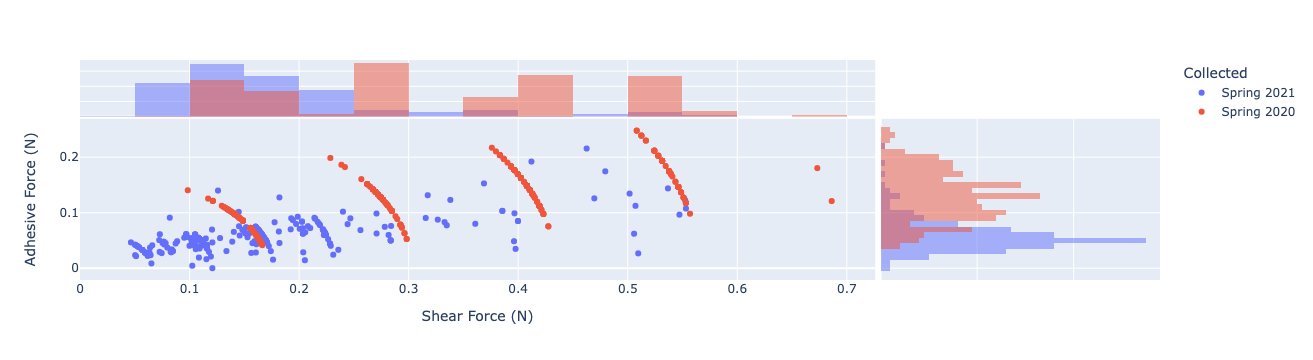

In [54]:
px.scatter(data_frame = class_data.to_df(), x="Shear Force (N)", y = "Adhesive Force (N)", color = "Collected", marginal_y = "histogram", marginal_x = "histogram")

In [41]:
class_data.to_df()

,Collected,Mass (g),Angle (deg),Shear Force (N),Adhesive Force (N)
0,Spring 2021,11.71,28.0,0.101325,0.053876
1,Spring 2021,11.71,26.0,0.103144,0.050307
2,Spring 2021,11.71,32.0,0.097320,0.060812
3,Spring 2021,21.71,22.0,0.197266,0.079701
4,Spring 2021,21.71,24.0,0.194364,0.086536
...,...,...,...,...,...
538,Spring 2020,44.30,20.0,0.407958,0.148485
539,Spring 2020,57.70,18.0,0.537784,0.174737
540,Spring 2020,17.50,16.0,0.164856,0.047272
541,Spring 2020,30.90,17.0,0.289588,0.088536
